## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [39]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [40]:
x_train = x_train/x_train.max(axis=0)

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [42]:
model = Sequential()
model.add(Dense(13,input_shape=(13,), kernel_initializer='normal', activation='relu'))
model.add(Dense(26, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_36 (Dense)             (None, 26)                364       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 27        
Total params: 573
Trainable params: 573
Non-trainable params: 0
_________________________________________________________________


In [43]:
blackbox = model.fit(x_train,y_train, epochs = 50, validation_split=.1)

Train on 363 samples, validate on 41 samples
Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 594.7248 - val_loss: 504.5224
Epoch 2/50
363/363 [==============================] - 0s 83us/step - loss: 592.9912 - val_loss: 502.2562
Epoch 3/50
363/363 [==============================] - 0s 78us/step - loss: 589.7669 - val_loss: 497.8933
Epoch 4/50
363/363 [==============================] - 0s 79us/step - loss: 583.6124 - val_loss: 489.9293
Epoch 5/50
363/363 [==============================] - 0s 79us/step - loss: 572.6428 - val_loss: 476.5375
Epoch 6/50
363/363 [==============================] - 0s 74us/step - loss: 555.0499 - val_loss: 455.7753
Epoch 7/50
363/363 [==============================] - 0s 79us/step - loss: 528.4816 - val_loss: 426.2463
Epoch 8/50
363/363 [==============================] - 0s 75us/step - loss: 492.5568 - val_loss: 386.7364
Epoch 9/50
363/363 [==============================] - 0s 81us/step - loss: 445.4162 - val_loss: 338.3528
Epoch 10/50

# Julia

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [65]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [78]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [79]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
x_train = x_train.reshape(60000,784)

In [81]:
x_train = x_train/x_train.max(axis=0)

In [84]:
##### Your Code Here #####
model = Sequential()
model.add(Dense(16,input_shape=(784,), kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout_22 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [85]:
blackbox = model.fit(x_train,y_train, epochs = 50, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s 96us/step - loss: 0.9172 - acc: 0.6659 - val_loss: 0.5262 - val_acc: 0.8228
Epoch 2/50
54000/54000 [==============================] - 5s 86us/step - loss: 0.6436 - acc: 0.7696 - val_loss: 0.4903 - val_acc: 0.8232
Epoch 3/50
54000/54000 [==============================] - 5s 84us/step - loss: 0.6038 - acc: 0.7860 - val_loss: 0.4594 - val_acc: 0.8317
Epoch 4/50
54000/54000 [==============================] - 5s 84us/step - loss: 0.5791 - acc: 0.7925 - val_loss: 0.4410 - val_acc: 0.8383
Epoch 5/50
54000/54000 [==============================] - 5s 83us/step - loss: 0.5671 - acc: 0.7973 - val_loss: 0.4530 - val_acc: 0.8355
Epoch 6/50
54000/54000 [==============================] - 4s 83us/step - loss: 0.5552 - acc: 0.8013 - val_loss: 0.4315 - val_acc: 0.8418
Epoch 7/50
54000/54000 [==============================] - 5s 83us/step - loss: 0.5508 - acc: 0.8032 - val_loss: 0.4418 - val_acc:

In [97]:
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

keras.utils.vis_utils.pydot = pydot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

NameError: name 'pydot' is not defined

In [87]:
dir(blackbox)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

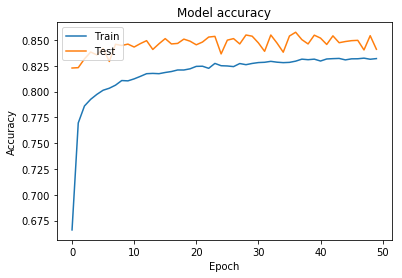

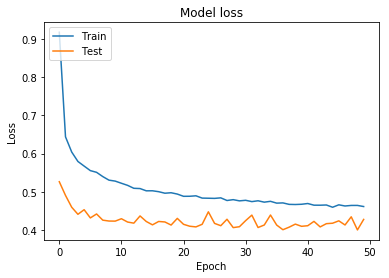

In [99]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(blackbox.history['acc'])
plt.plot(blackbox.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(blackbox.history['loss'])
plt.plot(blackbox.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_85 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_86 (Dense)             (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s 96us/step - loss: 0.6594 - acc: 0.7686 - val_loss: 0.4746 - val_acc: 0.8308
Epoch 2/50
54000/54000 [==============================] - 5s 84us/step - loss: 0.4493 - acc: 0.8417 - val_loss: 0.4186 - val_acc: 0.8532
Epoch 3/50
54000/54000 [==============================] - 5s 84us/step - loss: 

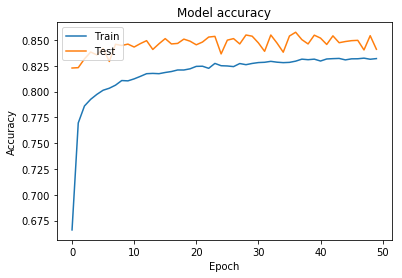

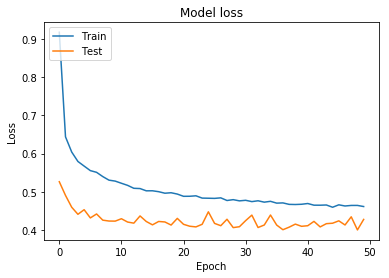

In [103]:
model = Sequential()
model.add(Dense(16,input_shape=(784,), kernel_initializer='normal', activation='relu'))

model.add(Dense(32, kernel_initializer='normal', activation='relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

blackbox_no_dropout = model.fit(x_train,y_train, epochs = 50, validation_split=.1)

import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(blackbox.history['acc'])
plt.plot(blackbox.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(blackbox.history['loss'])
plt.plot(blackbox.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Julia


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.